In [1]:
import sys
sys.path.append('../../PI_GP_regressor')

from main_class import PhysicsInformedGP_regressor
from kernels.kernel_wave_eq import gram_Matrix_jax,k_ff_jax, k_fu_jax, k_uf_jax, k_uu
import numpy as np

 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\final_examples\wave_equation\../../PI_GP_regressor\main_class.py:940: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\final_examples\wave_equation\../../PI_GP_regressor\main_class.py:952: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\final_examples\wave_equation\../../PI_GP_regressor\main_class.py:985: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\final_examples\wave_equation\../../PI_GP_regressor\main_class.py:997: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


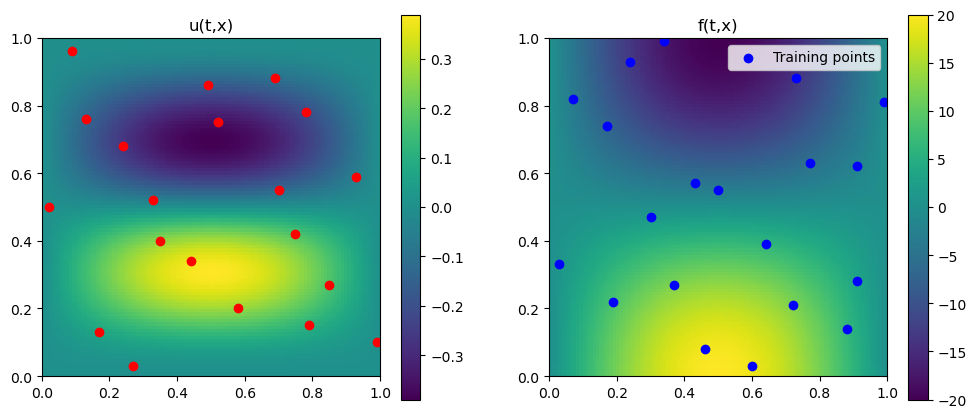

In [2]:
kernel_list = [gram_Matrix_jax, k_uu, k_uf_jax, k_fu_jax, k_ff_jax]
hyperparameters = ["l_x", "sigma_f","l_t", "c"]
model_wave_equation = PhysicsInformedGP_regressor(kernel_list,timedependence=True, params=hyperparameters)
model_wave_equation.set_name_kernel("Wave_equation")

n_training_points = 20
noise = [1e-8,1e-8]
model_wave_equation.set_training_data("wave_second.csv",n_training_points, noise)
n_validation_points = 500  #for calculating the MSE
model_wave_equation.set_validation_data(n_validation_points)
model_wave_equation.plot_raw_data(True,True)

In [9]:
def get_initial_values():
    """returns the initial values for the hyperparameters
    for the length scales we initialize them randomly as log(l) ~ U(-1.3,1)
    """
    rng = np.random.default_rng()
    theta_initial = np.zeros((4))
    theta_initial[0] = np.exp(rng.uniform(-1.3, 0.3, 1))  #lx
    theta_initial[1] = rng.uniform(0, 1, 1)               #sigma_f
    theta_initial[2] = np.exp(rng.uniform(-1.3, 0.3, 1))  #lt
    theta_initial[3] = rng.uniform(1, 4, 1)               #c
    return theta_initial
n_restarts = 200
n_threads = 8
opt_params_dict = {'theta_initial': get_initial_values,   #needed for all optimization methods
                    'bounds': ((1e-2, None), (1e-5, None), (1e-3, None),(1e-2, None)), #needed for TNC and L-BFGS-B
                    'gtol': 1e-6}
model_wave_equation.train("Nelder-Mead",n_restarts, n_threads,opt_params_dict)

100%|██████████| 200/200 [00:40<00:00,  4.92it/s]


 final_simplex: (array([[0.69286152, 0.36713551, 0.23587523, 3.00430857],
       [0.69286152, 0.36713551, 0.23587523, 3.00430857],
       [0.69286153, 0.36713551, 0.23587522, 3.00430857],
       [0.69286152, 0.36713551, 0.23587523, 3.00430857],
       [0.69286152, 0.36713551, 0.23587522, 3.00430857]]), array([18.95042038, 18.95042038, 18.95042038, 18.95042038, 18.95042038]))
           fun: 18.950420379638672
       message: 'Optimization terminated successfully.'
          nfev: 333
           nit: 165
        status: 0
       success: True
             x: array([0.69286152, 0.36713551, 0.23587523, 3.00430857])


In [4]:
n_test_points = 100
x_star, t_star = np.meshgrid(np.linspace(0, 1, n_test_points), np.linspace(0, 1, n_test_points))
X_star = np.hstack((x_star.reshape(-1, 1), t_star.reshape(-1, 1)))
model_wave_equation.predict_model(X_star)

Traced<ShapedArray(float32[20,20])>with<DynamicJaxprTrace(level=2/0)>
Traced<ShapedArray(float32[10000,20])>with<DynamicJaxprTrace(level=1/0)>


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


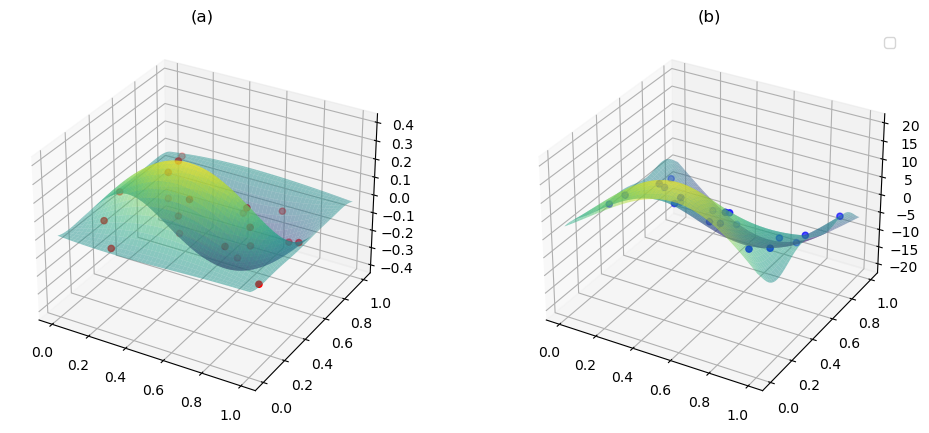

In [5]:
model_wave_equation.plot_prediction(X_star, "Predictive mean $\\overline{ f_*}$", "predictive_mean.png",heat_map=False)

Traced<ShapedArray(float32[500,20])>with<DynamicJaxprTrace(level=1/0)>
-----------------------------------------------
GP with kernel: 
Training data: (20, 2)
Training targets: (40, 1)
Hyperparameters: {'l_x': 0.6906310155813067, 'sigma_f': 0.3695898842135076, 'l_t': 0.23496250040359024, 'c': 3.0031872836019247}
Log marginal likelihood: 18.95912742614746
Mean squared error: {'u': 8.1857833720278e-06, 'f': 0.7936925292015076}
Relative l2 error: {'u': 0.01616354773939671, 'f': 0.08906946429928565}
-----------------------------------------------



 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\final_examples\wave_equation\../../PI_GP_regressor\main_class.py:674: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\final_examples\wave_equation\../../PI_GP_regressor\main_class.py:683: RuntimeWarning:invalid value encountered in sqrt


Traced<ShapedArray(float32[10201,20])>with<DynamicJaxprTrace(level=1/0)>


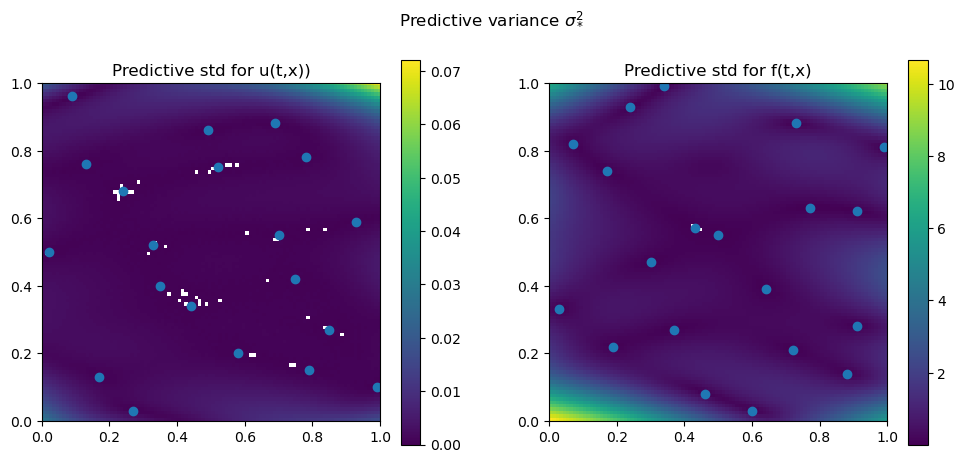

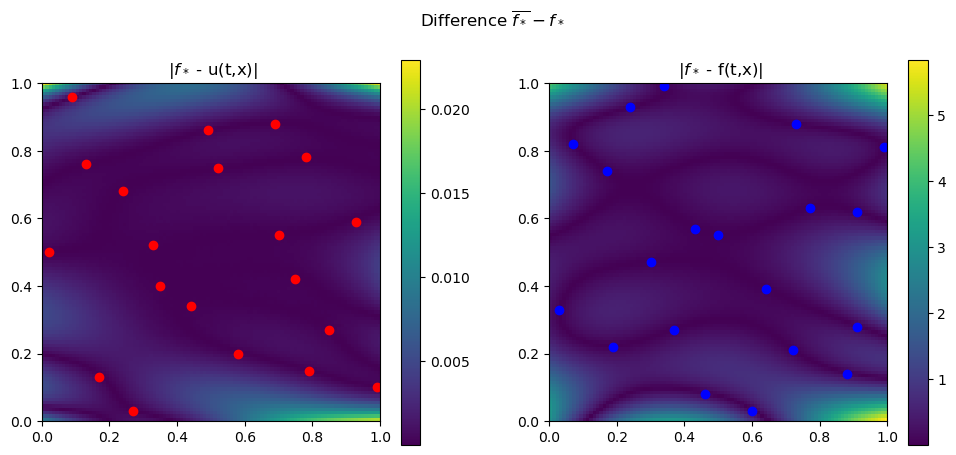

In [6]:
model_wave_equation.error()
print(model_wave_equation)
model_wave_equation.plot_variance(X_star, "Predictive variance $\\sigma_*^2$", "predictive_variance.png")
model_wave_equation.plot_difference( "Difference $\\overline{ f_*} - f_*$", "difference.png")

Now the same thing with GPy and a classical RBF kernel

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


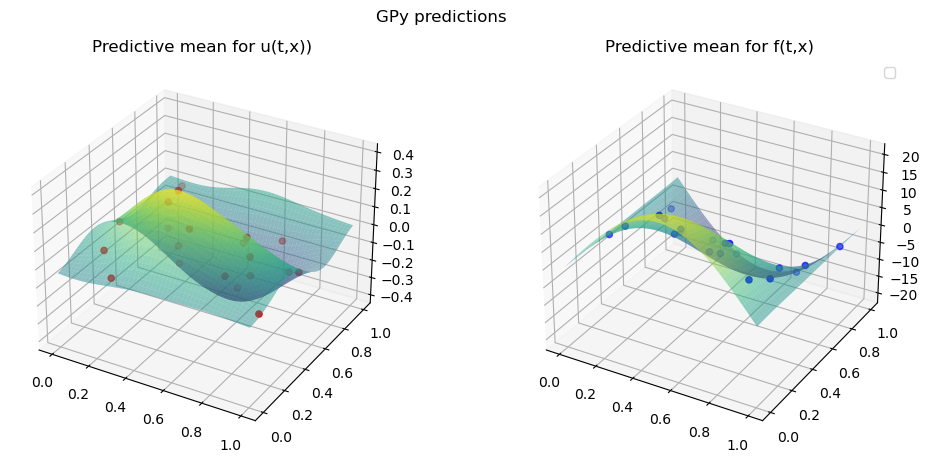

In [7]:
model_wave_equation.use_GPy(X_star,"GPy",False)


MSE_u:  0.00032295008560476656
MSE_f:  0.0009367981485321695
relative error u:  0.10127081754392099
relative error f:  0.003060865876656323


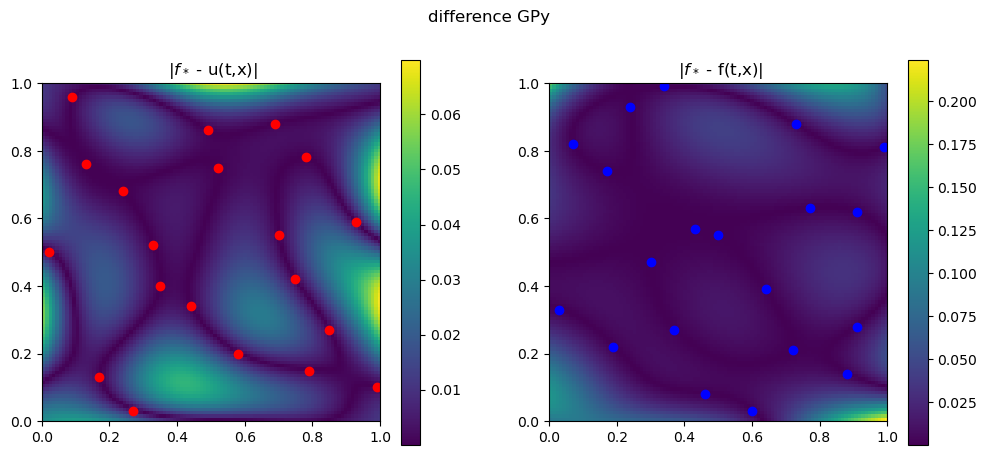

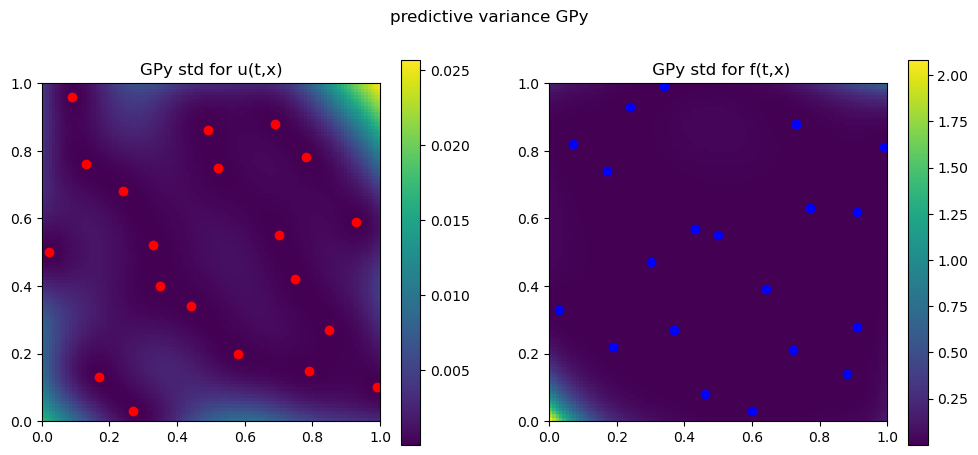

In [8]:
model_wave_equation.plot_difference_GPy("difference GPy ", "GPy_difference.png")
model_wave_equation.plot_variance_GPy("predictive variance GPy ", "GPy_variance.png")